In [14]:
!pip install association-metrics

In [15]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [16]:
df=pd.read_csv("cardekho.csv")

In [17]:
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [18]:
df.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [19]:
df.tail()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [20]:
df.dtypes

Car_Name         object
Year              int64
Selling_Price     int64
Kms_Driven        int64
Fuel_Type        object
Seller_Type      object
Transmission     object
Owner            object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Kms_Driven     4340 non-null   int64 
 4   Fuel_Type      4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [22]:
df.describe()

,Year,Selling_Price,Kms_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.096774,5.043381e+05,66195.040092
std,4.215757,5.785445e+05,46649.084846
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2022.000000,8.900000e+06,806599.000000


In [23]:
df.nunique()

Car_Name         1491
Year               29
Selling_Price     445
Kms_Driven        770
Fuel_Type           5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

In [24]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:
df.corr()

,Year,Selling_Price,Kms_Driven
Year,1.000000,0.413963,-0.419624
Selling_Price,0.413963,1.000000,-0.192348
Kms_Driven,-0.419624,-0.192348,1.000000


In [26]:
df['Year'].max()

2022

In [27]:
current_age = df['Year'].max()
df['car_age'] = current_age - df['Year']
df['car_age']

0       15
1       15
2       10
3        5
4        8
        ..
4335     8
4336     8
4337    13
4338     6
4339     6
Name: car_age, Length: 4340, dtype: int64

In [28]:
df['car_age'].max()

30

In [29]:
df_subset = df[['car_age','Kms_Driven']]
df_subset

,car_age,Kms_Driven
0,15,70000
1,15,50000
2,10,100000
3,5,46000
4,8,141000
...,...,...
4335,8,80000
4336,8,80000
4337,13,83000
4338,6,90000


In [30]:
set(df['Owner'])

{'First Owner',
 'Fourth & Above Owner',
 'Second Owner',
 'Test Drive Car',
 'Third Owner'}

In [31]:
sum_sell = df['Selling_Price'].sum()
age_sell = df.groupby('Owner')['Selling_Price'].agg(['sum','mean','median','count'])
sum_sell

2188827533

In [32]:
age_sell

,sum,mean,median,count
Owner,,,,
First Owner,1696289898,598760.994705,450000.0,2833
Fourth & Above Owner,14085997,173901.197531,130000.0,81
Second Owner,380343544,343891.088608,250499.5,1106
Test Drive Car,16222997,954293.941176,894999.0,17
Third Owner,81885097,270247.844884,190000.0,303


In [33]:
age_sell['owner_weight'] = age_sell['sum']/sum_sell
age_sell

,sum,mean,median,count,owner_weight
Owner,,,,,
First Owner,1696289898,598760.994705,450000.0,2833,0.774976
Fourth & Above Owner,14085997,173901.197531,130000.0,81,0.006435
Second Owner,380343544,343891.088608,250499.5,1106,0.173766
Test Drive Car,16222997,954293.941176,894999.0,17,0.007412
Third Owner,81885097,270247.844884,190000.0,303,0.037410


In [34]:
owner_dict = {
    'First Owner':7,
    'Fourth & Above Owner':1,
    'Second Owner':5,
    'Test Drive Car':9,
    'Third Owner':3
}

In [35]:
df['Owner_Original']=df['Owner'].map(owner_dict)

In [36]:
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Owner_Original
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15,7.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15,7.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10,7.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5,7.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8,5.0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,8,5.0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,8,5.0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,13,5.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,6,7.0


In [37]:
df['car_mfg'] = df['Car_Name'].str.split(n=1).str[0]
df['car_mfg']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: car_mfg, Length: 4340, dtype: object

In [38]:
set(df['Fuel_Type'])

{'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'}

In [39]:
df['Fuel_Type'].value_counts()

Diesel      2149
Petrol      2122
CNG           40
LPG           23
Electric       6
Name: Fuel_Type, dtype: int64

<Axes: >

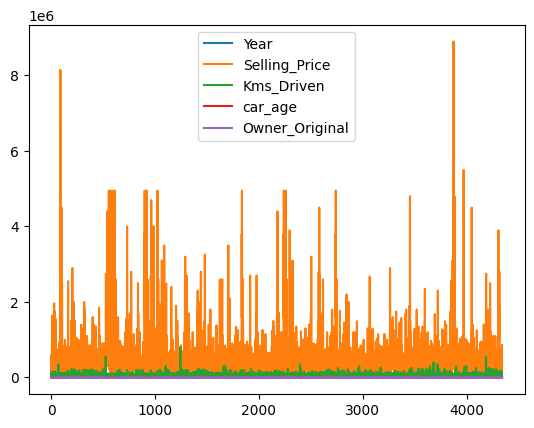

In [40]:
df.head()
df.plot()

<Axes: >

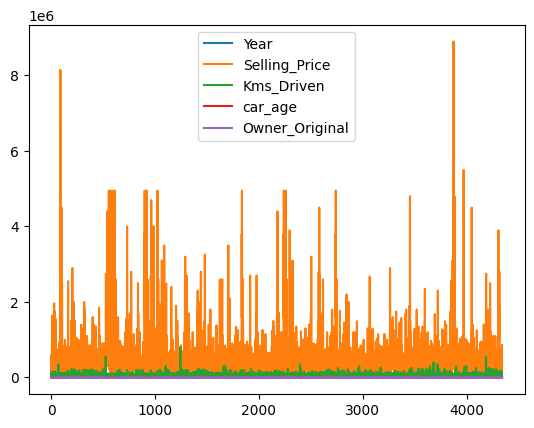

In [41]:
df.tail()
df.plot()

In [42]:
fig = px.scatter(df, x="Selling_Price", y='car_age', title='car_age vs Selling Price')
fig.show()

In [43]:
fig = px.scatter(df, x="Kms_Driven", y="Selling_Price", title='Km Driven vs Selling Price')
fig.show()

In [44]:
df["Brand"] = df["Car_Name"].apply(lambda x: x.strip().split(" ")[0].strip())

In [45]:
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Owner_Original,car_mfg,Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15,7.0,Maruti,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15,7.0,Maruti,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10,7.0,Hyundai,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5,7.0,Datsun,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8,5.0,Honda,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,8,5.0,Hyundai,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,8,5.0,Hyundai,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,13,5.0,Maruti,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,6,7.0,Hyundai,Hyundai


In [46]:
df["Brand"].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [47]:
fig = px.scatter_3d(df, x='Year', y='Kms_Driven', z='Selling_Price',
              color='Brand',title='3D Scatter Plot')
fig.show()

In [48]:
fig = px.scatter(df, x="Year", y="Kms_Driven",
                 size='Selling_Price', hover_data=['Brand'])
fig.show()

In [49]:
fig = px.line_3d(df, x="Year", y="Kms_Driven", z="Selling_Price", color='Brand',title='3D Line Plot')
fig.show()

In [50]:
fig = px.scatter_matrix(df)
fig.show()

In [51]:
fig = px.scatter_matrix(df,
    dimensions=["Year", "Kms_Driven", "Selling_Price", "car_age"],
    color="Brand")
fig.show()

In [52]:
fig = px.pie(df, values='Year', names='Brand')
fig.show()

In [53]:
fig = px.sunburst(df, path=['Year', 'Brand', 'car_age'], values='Selling_Price')
fig.show()

In [54]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age', 'Owner_Original',
       'car_mfg', 'Brand'],
      dtype='object')

In [55]:
data = dict(
    number=[1280,821,365,361,252,238,206,188,146],
    stage=["Maruti", "Hyundai  ", "Mahindra", "Tata", "Honda","Ford","Toyota","Chevrolet","Renault"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [56]:
fig = px.histogram(df, x="Selling_Price")
fig.show()

In [57]:
fig = px.histogram(df, x="Year")
fig.show()

In [58]:
fig = px.histogram(df, x="Brand")
fig.show()

In [59]:
fig = px.bar(df, x = "car_age", y = "Selling_Price",color="Year")
fig.show()

In [60]:
fig = px.box(df, y="Selling_Price")
fig.show()

In [61]:
fig = px.density_heatmap(df, x="car_age", y="Selling_Price")
fig.show()

In [62]:
fig = px.density_contour(df, x="car_age", y="Year")
fig.show()

In [63]:
fig = px.density_contour(df, x="car_age", y="Year", facet_col="Seller_Type", color="Brand")
fig.show()

In [64]:
# Box Plot
box_plot_fig = px.box(df, x='Fuel_Type', y='Selling_Price', color='Transmission',\
                      title='Box Plot of Selling Price by Fuel Type and Transmission')
box_plot_fig.show()

In [65]:
px.box(df,x='Selling_Price',points='suspectedoutliers')

In [66]:
df.loc[df['Kms_Driven']<1000]

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Owner_Original,car_mfg,Brand
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner,8,5.0,Mahindra,Mahindra
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car,2,9.0,Ford,Ford
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car,2,9.0,Ford,Ford
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car,2,9.0,Ford,Ford


There is no such co relation we can observe from this.

In [67]:
fig22 = px.pie(df,names='Seller_Type',title='Percentage of cars by Seller type')
fig22.show()

### Individual seller type has the most percentage

In [68]:
sunburst_fig = px.sunburst(df, path=['Fuel_Type', 'Transmission'], values='Selling_Price',
                           title='Sunburst Chart of Selling Price by Fuel Type and Transmission')
sunburst_fig.show()

In [69]:
fig3 = px.histogram(df, x='Selling_Price', nbins=50, title='Histogram of Selling Price',color_discrete_sequence=['#6495ED'])
fig3.show()

### From the range of 2L to 4L no of cars sold highest almost 1400

In [70]:
cars=df.groupby('Year')['Year'].count()
fig = px.line(cars, x=cars.index, y=cars.values,color_discrete_sequence=['#6495ED'],title='Cars_Sold_By_Year')
fig.show()

1.Highest sales recorded in the year of 2017 and after that sales decreased. 2.Surprisingly 2019 cars sold is less but selling price was high in that year,so there might be chance of elctric cars sold more in 2019.

In [71]:
cars=df.groupby('Transmission')['Transmission'].count()
fig12=px.bar(cars,x=cars.index,y=cars.values,labels={'y':'Cars_Sold'},color_discrete_sequence=['#03DAC5'])
fig12.show()

In [72]:
cars=df.groupby('Year')['Selling_Price'].mean()
fig = px.line(cars, x=cars.index, y=cars.values,title='Avg_selling_Price_by_Year',color_discrete_sequence=['#03DAC5'])
fig.show()

In [73]:
fig_box = px.box(df, x='Kms_Driven', title='Distribution of Kms Driven', height=250,
                         color_discrete_sequence=['#03DAC5'],
                         )

fig_box.show()

In [74]:
cars=df.groupby('Fuel_Type')['Kms_Driven'].mean()
fig12=px.bar(cars,x=cars.index,y=cars.values,labels={'y':'Avg_Kms_Driven'},color_discrete_sequence=['#6495ED'])
fig12.show()

In [75]:
cars=df.groupby('Owner')['Selling_Price'].mean()
fig12=px.bar(cars,x=cars.index,y=cars.values,labels={'y':'Avg_Selling_Price_By_Ownership'},color_discrete_sequence=['#6495ED'])
fig12.show()

In [76]:
cars=df.groupby('Fuel_Type')['Selling_Price'].mean()
fig12=px.bar(cars,x=cars.index,y=cars.values,labels={'y':'Avg_selling_price_by_Fuel_type'},color_discrete_sequence=['#03DAC5'])
fig12.show()

In [77]:
cars=df.groupby('Fuel_Type')['Fuel_Type'].count()
fig12=px.bar(cars,x=cars.index,y=cars.values,labels={'y':'Fuel_type_Cars_Sold'},color_discrete_sequence=['#6495ED'])
fig12.show()

In [78]:
cars=df.groupby('Fuel_Type').agg({'Selling_Price':'mean','Fuel_Type':'count'})
cars['Revenue']=cars['Selling_Price']*cars['Fuel_Type']
fig = px.bar(cars, x=cars.index, y=cars['Revenue'],title='Avg Revenue by Fuel type')
fig.update_xaxes(categoryorder='total descending')
# fig.update_yaxes(showgrid=False),
# fig.update_xaxes(showgrid=False),

In [79]:
fig = px.histogram(df, x="Owner", color="Fuel_Type", barmode="stack")
fig.update_layout(
    title="Cardekho - Stacked Column Chart by Owner and Fuel Type",
    xaxis_title="Owner_Type",
    yaxis_title="Count",
    legend_title="Fuel_Type")

fig.show()

In [80]:
corr=df.corr()
fig = px.imshow(corr, color_continuous_scale='YlOrRd',text_auto=True)
fig.update_layout(
    title='Correlation Matrix',
    margin=dict(l=100, r=100, t=100, b=100))
fig.show()

In [81]:
cars=df.groupby('car_age')['Selling_Price'].mean()
fig = px.bar(cars, x=cars.index, y=cars.values,title='Avg. Selling price by Age')
fig.update_xaxes(categoryorder='total descending')
fig.update_yaxes(showgrid=False),
fig.update_xaxes(showgrid=False),
fig.update_layout(xaxis_title='car_age', yaxis_title="Avg. Selling Price",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#ffffff', family="Muli, sans-serif"),
                        font=dict(color='#ffffff'),
                          )

In [82]:
df['Brand_Name']=df['Car_Name'].str.split()
df['Brand_Name']=df['Brand_Name'].apply(lambda x:x[0])
df.head(1)

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Owner_Original,car_mfg,Brand,Brand_Name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15,7.0,Maruti,Maruti,Maruti


In [83]:
cars=df.groupby('Brand_Name')['Selling_Price'].mean()
fig12=px.bar(cars,x=cars.index,y=cars.values,labels={'y':'Avg_SellingPrice_By_Btand'},color_discrete_sequence=['#03DAC5'])
fig12.update_xaxes(categoryorder='total descending')
fig12.show()

In [84]:
cars=df.groupby('Brand_Name').agg({'Selling_Price':'sum','Brand_Name':'count'})
cars['Revenue']=cars['Selling_Price']*cars['Brand_Name']
fig = px.bar(cars, x=cars.index, y=cars['Revenue'],title='Revenue by Car_Brands')
fig.update_xaxes(categoryorder='total descending')

### Lable Encoding for Finding best feature

In [85]:
# Finding The age of Cars
df.insert(0, "Age_of_car", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)
# df.head()

In [86]:
column_to_encode = 'Owner'
weights = {'First Owner': .8, 'Second Owner': .7, 'Fourth & Above Owner': .4,'Third Owner':.5,'Test Drive Car':.9}
df['weighted_Owner'] = df[column_to_encode].map(weights)

In [87]:
column_to_encode = 'Fuel_Type'
weights = {'CNG': 0, 'Diesel': .3, 'Electric': .2, 'LPG': .1, 'Petrol': .4}
# Create a new column for the weighted labels
df['weighted_Fuel'] = df[column_to_encode].map(weights)
# df.drop(['Owner','Fuel_Type'],inplace=True)

In [88]:
sum_sell=df['Selling_Price'].sum()
agg_sell=df.groupby('Owner')['Selling_Price'].agg(["count","mean","sum",'median'])
agg_sell['Owner_weight'] = agg_sell['sum']/sum_sell
agg_sell

,count,mean,sum,median,Owner_weight
Owner,,,,,
First Owner,2833,598760.994705,1696289898,450000.0,0.774976
Fourth & Above Owner,81,173901.197531,14085997,130000.0,0.006435
Second Owner,1106,343891.088608,380343544,250499.5,0.173766
Test Drive Car,17,954293.941176,16222997,894999.0,0.007412
Third Owner,303,270247.844884,81885097,190000.0,0.037410


In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Encoded_Transmission'] = le.fit_transform(df['Transmission'])
df['Encoded_Seller_Type'] = le.fit_transform(df['Seller_Type'])
# df['Encoded_Brand'] = le.fit_transform(df['Brand'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age_of_car            4340 non-null   int64  
 1   Car_Name              4340 non-null   int64  
 2   Selling_Price         4340 non-null   int64  
 3   Kms_Driven            4340 non-null   int64  
 4   Fuel_Type             4340 non-null   object 
 5   Seller_Type           4340 non-null   object 
 6   Transmission          4340 non-null   object 
 7   Owner                 4340 non-null   object 
 8   car_age               4340 non-null   int64  
 9   Owner_Original        4037 non-null   float64
 10  car_mfg               4340 non-null   object 
 11  Brand                 4340 non-null   object 
 12  Brand_Name            4340 non-null   object 
 13  weighted_Owner        4340 non-null   float64
 14  weighted_Fuel         4340 non-null   float64
 15  Encoded_Transmission 

In [90]:
numeric_cols = df.select_dtypes(include=['number'])

In [91]:
cat_cols = df.select_dtypes(include=['object'])

In [92]:
cat_cols.columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'car_mfg', 'Brand',
       'Brand_Name'],
      dtype='object')

In [93]:
df_cat=df[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [94]:
df=df[['Age_of_car', 'Car_Name', 'Selling_Price', 'Kms_Driven',\
       'weighted_Owner', 'weighted_Fuel', 'Encoded_Transmission',\
       'Encoded_Seller_Type']]

In [95]:
df

,Age_of_car,Car_Name,Selling_Price,Kms_Driven,weighted_Owner,weighted_Fuel,Encoded_Transmission,Encoded_Seller_Type
0,16,775,60000,70000,0.8,0.4,1,1
1,16,1041,135000,50000,0.8,0.4,1,1
2,11,505,600000,100000,0.8,0.3,1,1
3,6,118,250000,46000,0.8,0.4,1,1
4,9,279,450000,141000,0.7,0.3,1,1
...,...,...,...,...,...,...,...,...
4335,9,602,409999,80000,0.7,0.3,1,1
4336,9,601,409999,80000,0.7,0.3,1,1
4337,14,777,110000,83000,0.7,0.4,1,1
4338,7,381,865000,90000,0.8,0.3,1,1


In [96]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)

feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')
print(feature_ranking)


                Feature  Ranking
4         weighted_Fuel        1
3        weighted_Owner        2
5  Encoded_Transmission        3
0            Age_of_car        4
6   Encoded_Seller_Type        5
1              Car_Name        6
2            Kms_Driven        7


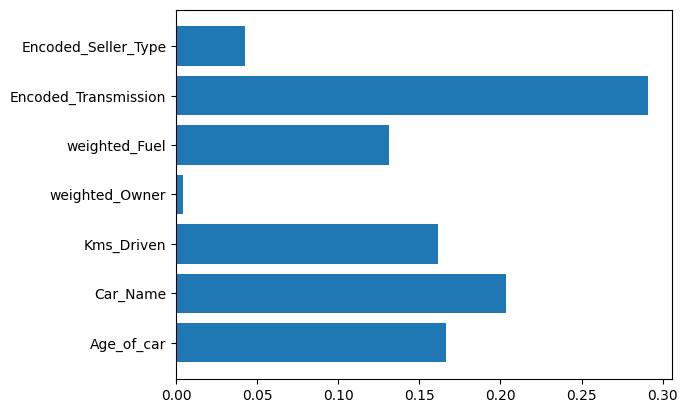

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Plot feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.show()

In [99]:
df.drop('Car_Name',axis=1,inplace=True)

In [100]:
continuous_features=df.select_dtypes(np.int64)

In [101]:
categorical_features=df.select_dtypes(np.object_)

In [102]:
df.columns

Index(['Age_of_car', 'Selling_Price', 'Kms_Driven', 'weighted_Owner',
       'weighted_Fuel', 'Encoded_Transmission', 'Encoded_Seller_Type'],
      dtype='object')

In [103]:
from scipy.stats import chi2_contingency

In [104]:
categorical_cols = df_cat

In [105]:
import association_metrics as am
import pandas as pd
import seaborn as sns
df = categorical_cols.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramers_v = am.CramersV(df)
cfit = cramers_v.fit().round(2)
print(cfit)

              Fuel_Type  Seller_Type  Transmission  Owner
Fuel_Type          1.00         0.04          0.07   0.03
Seller_Type        0.04         1.00          0.21   0.21
Transmission       0.07         0.21          1.00   0.09
Owner              0.03         0.21          0.09   1.00


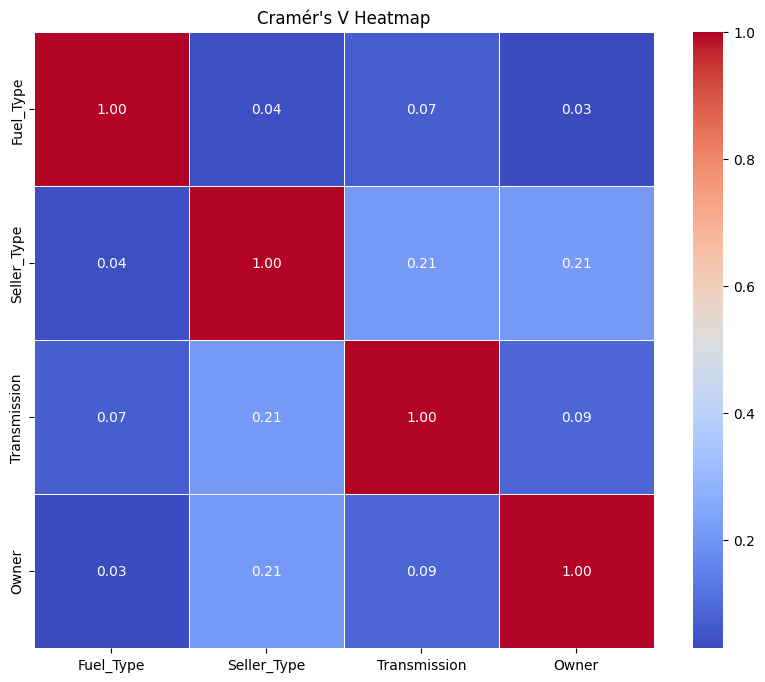

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(cfit, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Cramér's V Heatmap")
plt.show()

In [109]:
df = pd.read_csv('cardekho.csv')
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [111]:
df["Brand_Name"] = df["Car_Name"].apply(lambda x: x.strip().split(" ")[0].strip())
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [112]:
df["Age"] = df["Year"].apply(lambda x: 2023 - int(x))
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name,Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,9
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,9
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,9
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,14
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,7


In [119]:
df.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name,Age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,16
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,16
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,11
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,9


In [123]:
df_categorical = df[["Fuel_Type", "Seller_Type", "Transmission", "Owner", "Brand_Name"]]
df_categorical

,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name
0,Petrol,Individual,Manual,First Owner,Maruti
1,Petrol,Individual,Manual,First Owner,Maruti
2,Diesel,Individual,Manual,First Owner,Hyundai
3,Petrol,Individual,Manual,First Owner,Datsun
4,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...
4335,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Petrol,Individual,Manual,Second Owner,Maruti
4338,Diesel,Individual,Manual,First Owner,Hyundai


In [124]:
df_numeric = df[["Selling_Price", "Kms_Driven", "Age"]]
df_numeric

,Selling_Price,Kms_Driven,Age
0,60000,70000,16
1,135000,50000,16
2,600000,100000,11
3,250000,46000,6
4,450000,141000,9
...,...,...,...
4335,409999,80000,9
4336,409999,80000,9
4337,110000,83000,14
4338,865000,90000,7


Box Cox Transformation

Lambda value used for Transformation: -0.02275737355895134


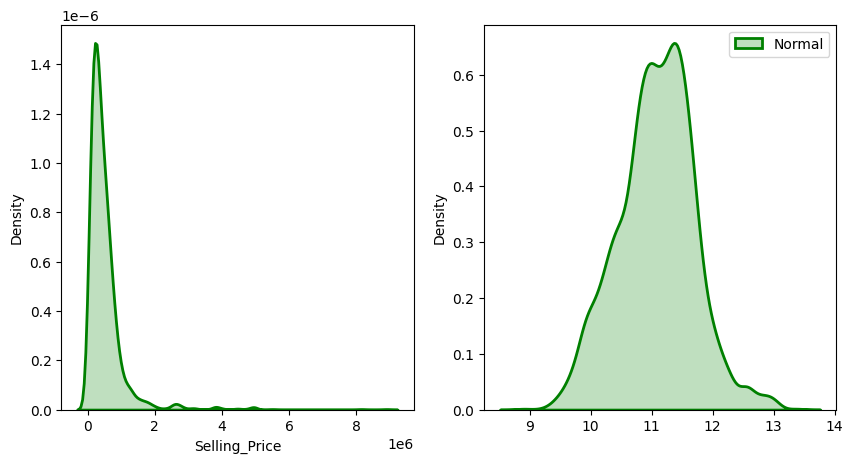

In [125]:
# transform training data & save lambda value
fitted_data1, fitted_lambda1 = stats.boxcox(df_numeric["Selling_Price"])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df_numeric["Selling_Price"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data1, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda1}")

Lambda value used for Transformation: 0.4214405309891848


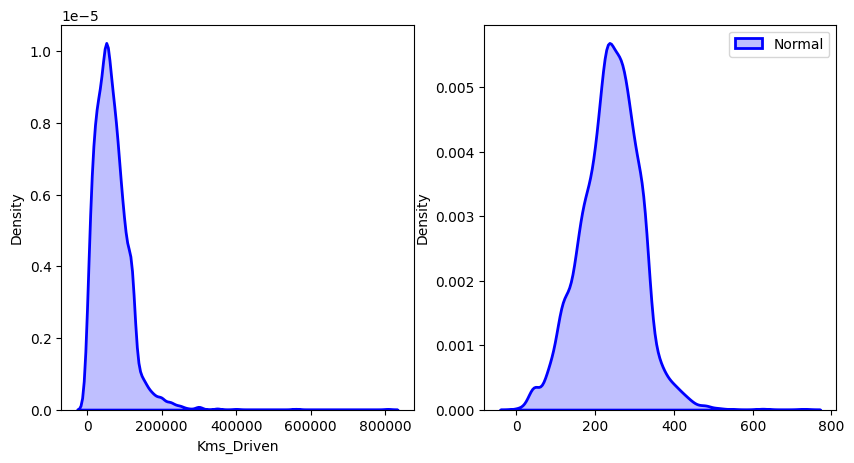

In [127]:
# transform training data & save lambda value
fitted_data2, fitted_lambda2 = stats.boxcox(df_numeric["Kms_Driven"])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df_numeric["Kms_Driven"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="blue", ax = ax[0])

sns.distplot(fitted_data2, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="blue", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda2}")

Lambda value used for Transformation: 0.1758703835559695


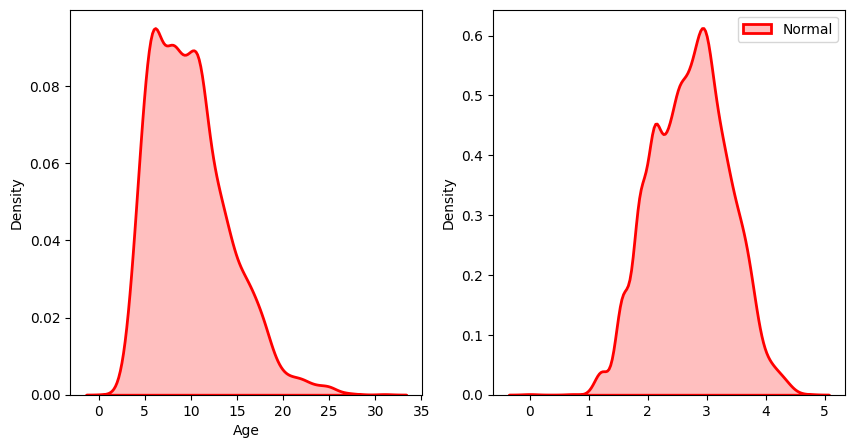

In [128]:
# transform training data & save lambda value
fitted_data3, fitted_lambda3 = stats.boxcox(df_numeric["Age"])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df_numeric["Age"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])

sns.distplot(fitted_data3, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="red", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda3}")

In [129]:
sp = pd.DataFrame(fitted_data1, columns = ["Selling_Price"])
kmd = pd.DataFrame(fitted_data2, columns = ["Kms_Driven"])
age = pd.DataFrame(fitted_data3, columns = ["Age"])
df_numeric_transformed = pd.concat([sp, kmd, age], axis = 1)

In [130]:
df_numeric_transformed

,Selling_Price,Kms_Driven,Age
0,9.732856,258.954251,3.573255
1,10.358380,224.404764,3.573255
2,11.479276,301.342265,2.982763
3,10.826027,216.574104,2.106211
4,11.266050,348.664543,2.682160
...,...,...,...
4335,11.196751,274.082248,2.682160
4336,11.196751,274.082248,2.682160
4337,10.201497,278.404867,3.358342
4338,11.748393,288.151372,2.320352


In [131]:
# Skewness of transformed Selling_Price
stats.skew(df_numeric_transformed.Selling_Price)

-0.0014288549778949558

In [132]:
# Skewness of transformed Kms_Driven
stats.skew(df_numeric_transformed.Kms_Driven)

0.04523025593796244

In [133]:
# Skewness of transformed Age
stats.skew(df_numeric_transformed.Age)

-0.011117033123389396

Variance Inflation Factor

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF calculation
# the independent variables set
X = df_numeric_transformed

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature        VIF
0  Selling_Price  14.728122
1     Kms_Driven  16.310912
2            Age  22.913636


In [135]:
# Since Age has a high VIF value it can be dropped. Calculation of VIF after age has been dropped is as follows:
# the independent variables set
X = df_numeric_transformed[["Selling_Price", "Kms_Driven"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature       VIF
0  Selling_Price  9.867702
1     Kms_Driven  9.867702


In [136]:
# We drop the Age column due to high VIF
df_numeric_transformed.drop("Age", axis = 1, inplace = True)

In [137]:
df_categorical

,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name
0,Petrol,Individual,Manual,First Owner,Maruti
1,Petrol,Individual,Manual,First Owner,Maruti
2,Diesel,Individual,Manual,First Owner,Hyundai
3,Petrol,Individual,Manual,First Owner,Datsun
4,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...
4335,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Petrol,Individual,Manual,Second Owner,Maruti
4338,Diesel,Individual,Manual,First Owner,Hyundai


In [138]:
df_categorical.Fuel_Type.value_counts()

Diesel      2149
Petrol      2122
CNG           40
LPG           23
Electric       6
Name: Fuel_Type, dtype: int64

Label Encoding

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fte = le.fit_transform(df_categorical.Fuel_Type)
ste = le.fit_transform(df_categorical.Seller_Type)
te = le.fit_transform(df_categorical.Transmission)
oe = le.fit_transform(df_categorical.Owner)
bne = le.fit_transform(df_categorical.Brand_Name)


In [150]:
# Assuming fte, ste, te, oe, and bne are your NumPy arrays
# Convert NumPy arrays to Pandas DataFrames
fte_df = pd.DataFrame(fte,columns=["Fuel_Type"])
ste_df = pd.DataFrame(ste,columns=["Seller_Type"])
te_df = pd.DataFrame(te,columns=["Transmission"])
oe_df = pd.DataFrame(oe,columns=["Owner"])
bne_df = pd.DataFrame(bne,columns=["Brand_Name"])

# Concatenate Pandas DataFrames along axis 1 (columns)
df_categorical_encoded = pd.concat([fte_df, ste_df, te_df, oe_df, bne_df], axis=1)
df_categorical_encoded

,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name
0,4,1,1,0,18
1,4,1,1,0,18
2,1,1,1,0,10
3,4,1,1,0,5
4,1,1,1,2,9
...,...,...,...,...,...
4335,1,1,1,2,10
4336,1,1,1,2,10
4337,4,1,1,2,18
4338,1,1,1,0,10


In [151]:
# Import association_metrics
import association_metrics as am

# Convert you str columns to Category columns
df_categorical_ = df_categorical.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df_categorical_)
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name
Fuel_Type,1.000000,0.041651,0.066201,0.032909,0.283547
Seller_Type,0.041651,1.000000,0.214714,0.207076,0.239561
Transmission,0.066201,0.214714,1.000000,0.091967,0.580307
Owner,0.032909,0.207076,0.091967,1.000000,0.137687
Brand_Name,0.283547,0.239561,0.580307,0.137687,1.000000


In [152]:
fig = px.imshow(cramersv.fit(), text_auto = True)
fig.show()

In [153]:
# Cramer's V Coefficient marginalisation
# CV <= 0.2 : Result is weak. Variables are weakly associated.
# 0.2 < CV <= 0.6 : Result is moderate. Variables are moderately associated.
# CV > 0.6 : Result is strong. Variables are strongly associated.

# Since Brand_Name has the highest association among the variables we deny it in our dataset.

df_c = df_categorical.drop(["Brand_Name"], axis = 1)
# Convert you str columns to Category columns
df_c_ = df_c.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df_c_)
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

,Fuel_Type,Seller_Type,Transmission,Owner
Fuel_Type,1.000000,0.041651,0.066201,0.032909
Seller_Type,0.041651,1.000000,0.214714,0.207076
Transmission,0.066201,0.214714,1.000000,0.091967
Owner,0.032909,0.207076,0.091967,1.000000


In [154]:
fig = px.imshow(cramersv.fit(), text_auto = True)
fig.show()

In [157]:
from scipy.stats import shapiro

shapiro(df_numeric_transformed["Kms_Driven"])

ShapiroResult(statistic=0.989423394203186, pvalue=1.6575481865700997e-17)

Since we know the data has already been transformed using the Box-Cox transformation but the p-value denies so, which means
there is a Type I error in the test.

In [161]:
## Since Selling_Price is the target variable we keep it as it is without transformation
dfFinal = pd.concat([df_categorical_encoded, df_numeric_transformed.Kms_Driven, df_numeric.Selling_Price], axis = 1)

In [162]:
dfFinal

,Fuel_Type,Seller_Type,Transmission,Owner,Kms_Driven,Selling_Price
0,4,1,1,0,258.954251,60000
1,4,1,1,0,224.404764,135000
2,1,1,1,0,301.342265,600000
3,4,1,1,0,216.574104,250000
4,1,1,1,2,348.664543,450000
...,...,...,...,...,...,...
4335,1,1,1,2,274.082248,409999
4336,1,1,1,2,274.082248,409999
4337,4,1,1,2,278.404867,110000
4338,1,1,1,0,288.151372,865000
